## [Cartopy](http://scitools.org.uk/cartopy/)

- Cartopy é um pacote Python que auxilia na criação de mapas.
- Usa o matplotlib *under the hood*.
- Adequado para análises e visualização de dados geoespaciais.

## Diferente to basemap a API é integrada ao do matplotlib

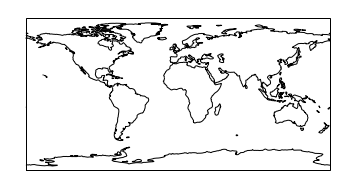

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import cartopy.crs as ccrs

ax = plt.axes(projection=ccrs.PlateCarree())
c = ax.coastlines()

## Exercício: explore os métodos extras que o cartopy adicionou no objeto `ax` e refaça o mapa acima reduzindo a região.

```python
ax0 = plt.axes()
ax1 = plt.axes(projection=ccrs.PlateCarree())

mpl = [obj for obj in dir(ax0) if not obj.startswith('_')]
cart = [obj for obj in dir(ax1) if not obj.startswith('_')]

set(mpl).symmetric_difference(cart)
```

## Podemos adicionar feições usando `features`

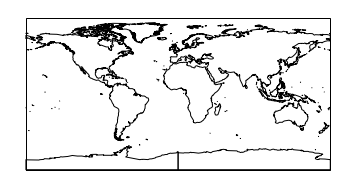

In [2]:
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())

coastline = cfeature.GSHHSFeature(scale='coarse')
c = ax.add_feature(coastline)

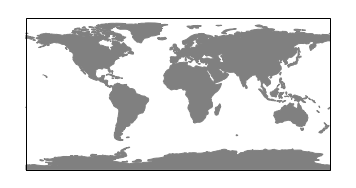

In [3]:
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())

land = cfeature.LAND
c = ax.add_feature(land, facecolor='grey')

## Exercício: refaça o mapa reduzido do primeiro exercíco usando linhas de costa da `GSHHS` e muda a resolução de `'coarse'` para algo "melhor" e adicione a `feature` `land`.

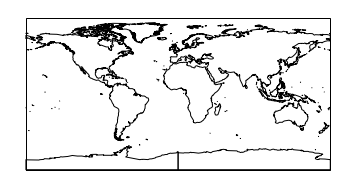

In [4]:
fig, ax = plt.subplots(subplot_kw=dict(projection=ccrs.PlateCarree()))
coastline = cfeature.GSHHSFeature(scale='coarse')
c = ax.add_feature(coastline)

## cartopy é o primeiro software a resolver adequadamente o problema da *dateline*

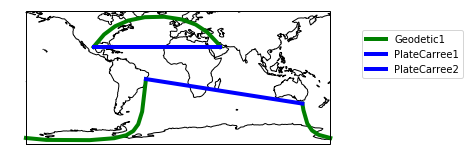

In [5]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

kw = dict(linewidth=4, color='g', transform=ccrs.Geodetic())
ax.plot([-100, 50], [25, 25], label='Geodetic1', **kw)
ax.plot([-38, 147], [-13, -42], label='Geodetic1', **kw)

kw = dict(linewidth=4, color='b', transform=ccrs.PlateCarree())
ax.plot([-100, 50], [25, 25], label='PlateCarree1', **kw)
ax.plot([-38, 147], [-13, -42], label='PlateCarree2', **kw)

leg = ax.legend(loc=(1.05, 0.5))

## Adding gridlines

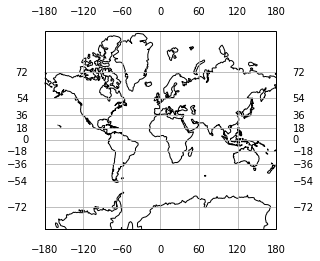

In [6]:
ax = plt.axes(projection=ccrs.Mercator())
ax.coastlines()

gl = ax.gridlines(draw_labels=True)

## Exercício: 
Customize gridlines do exemplo abaixo  usando o `LONGITUDE_FORMATTER` e modifique os *tickmarker* da latitude para mostrar os limites máximo, -30, +30 e 0

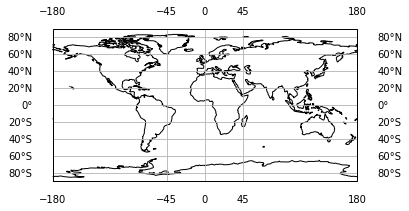

In [7]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LATITUDE_FORMATTER

ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
gl = ax.gridlines(draw_labels=True)

gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.yformatter = LATITUDE_FORMATTER

## Re-utilizando código (uso de funções)

In [8]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def make_cartopy(projection=ccrs.Robinson(),
                 figsize=(6, 4),
                 resolution='110m'):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw=dict(projection=projection)
    )
    ax.set_global()
    ax.coastlines(resolution=resolution, color='k')
    gl = ax.gridlines(draw_labels=False)
    ax.add_feature(cfeature.LAND, facecolor='0.75')
    return fig, ax

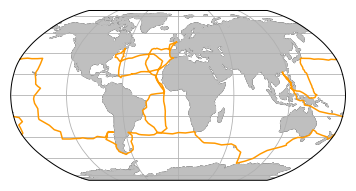

In [9]:
lon, lat = np.loadtxt('./data/challenger_path.csv',
                      delimiter=',', unpack=True)

fig, ax = make_cartopy(projection=ccrs.Robinson(), resolution='110m')

kw = dict(color='#FF9900', linestyle='-', linewidth=1.5)
line = ax.plot(lon, lat, transform=ccrs.Geodetic(), **kw)

## io.img_tiles

In [10]:
import cartopy.io.img_tiles as cimgt


def request_map(map_request, figsize=(8, 8), zoom=8):
    fig, ax = plt.subplots(figsize=figsize,
                           subplot_kw=dict(projection=map_request.crs))
    ax.set_extent([-39, -38.25, -13.25, -12.5])
    ax.add_image(map_request, zoom)
    return fig, ax

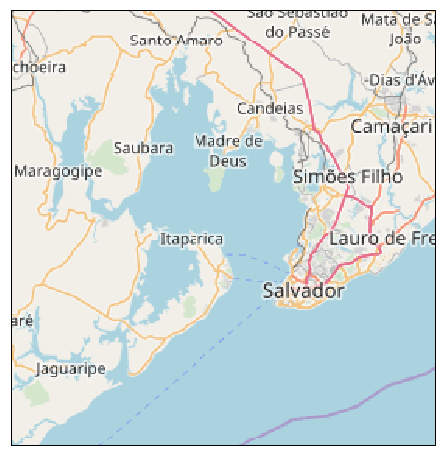

In [11]:
fig, ax = request_map(cimgt.OSM(), zoom=9)

## Exercício:

Tente outros *tiles*

```python
cimgt.GoogleTiles(<shift+tab>)
```

## Acessando dados do [Natural Earth](http://www.naturalearthdata.com/) diretamente

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from cartopy.feature import NaturalEarthFeature, LAND, COASTLINE
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


def brazil_states(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(8, 6), subplot_kw=dict(projection=projection))
    ax.set_extent([-82, -32, -45, 10])
    ax.stock_img()
    ax.add_feature(LAND)
    ax.add_feature(COASTLINE)
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = False
    gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

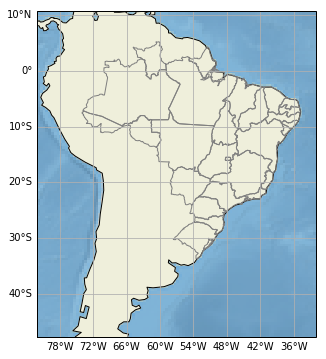

In [13]:
fig, ax = brazil_states()
states = NaturalEarthFeature(
    category='cultural',
    scale='50m',
    facecolor='none',
    name='admin_1_states_provinces_shp'
)
feat = ax.add_feature(states, edgecolor='gray')

## Plotando sobre uma imagem

In [14]:
lon = [-40.77, -40.51, -40.30, -40.23, -40.13, -40.06, -39.99,
       -39.87, -39.72, -39.52, -39.32, -39.11, -38.91, -38.71]
lat = [-21.29, -21.39, -21.48, -21.51, -21.56, -21.58, -21.62,
       -21.69, -21.76, -21.86, -21.96, -22.08, -22.15, -22.25]

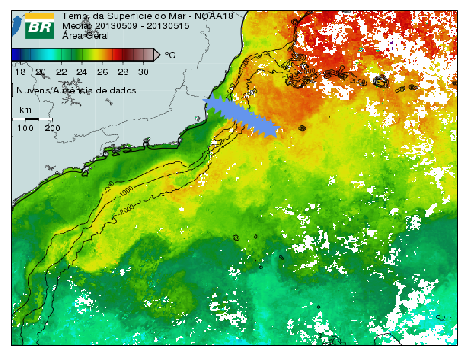

In [15]:
fig, ax = plt.subplots(figsize=(8, 8),
    subplot_kw=dict(projection=ccrs.PlateCarree()))
img = plt.imread('data/AVHRR.png')
img_extent = (-48, -32, -30, -18)

ax.imshow(img, origin='upper', extent=img_extent,
          transform=ccrs.PlateCarree())
ax.coastlines(resolution='50m', color='black', linewidth=1)

lines = ax.plot(lon, lat, 'cornflowerblue', marker='*',
                markersize=20)

## Desafio (para casa)

Faça o download de uma carta naútica e plote algo sobre ela como fizemos acima.

## Lendo shapefiles

In [16]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.io import shapereader
from cartopy.mpl.gridliner import (LONGITUDE_FORMATTER,
                                   LATITUDE_FORMATTER)


def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(6, 6),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True)
    gl.xlabels_top = gl.ylabels_right = False
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

## GSHHS

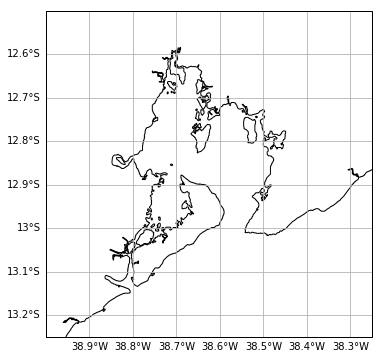

In [17]:
import cartopy.feature as cfeature

extent = [-39, -38.25, -13.25, -12.5]
coastline = cfeature.GSHHSFeature(scale='full')

fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)
art = ax.add_feature(coastline)

## Quando esses dados não bastam...

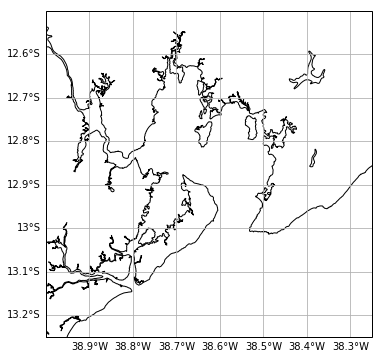

In [18]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = shapereader.Reader('./data/BTS/BTS.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='w',
                      edgecolor='black')

## Plotando seus dados

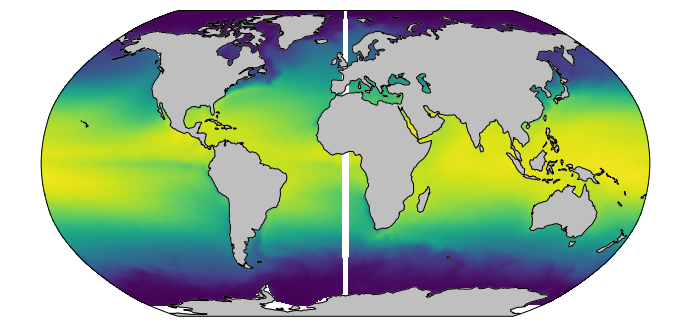

In [19]:
from netCDF4 import Dataset

with Dataset('data/sea_water_temperature.nc') as nc:
    lat = nc['lat'][:]
    lon = nc['lon'][:]
    temp = nc['t_an'][:]

lon, lat, np.meshgrid(lon, lat)

fig, ax = plt.subplots(figsize=(12, 10),
                       subplot_kw=dict(projection=ccrs.Robinson()))
ax.add_feature(cfeature.LAND, facecolor='0.75')
cs = ax.pcolormesh(lon, lat, temp,
                   transform=ccrs.PlateCarree())
c = ax.coastlines()

## Exercício:

Use o módulo `cmocean` e refaça a figura um usando outro colormap.

```python
from cmocean import cm
cm.<shift+tab>
```

## Exercício:

Plotar os dados do arquivo `lat_long_BTS.xlsx` no mapa abaixo.

In [20]:
import pandas as pd

df = pd.read_excel('data/rivers_BTS.xlsx')

df.head()

,Tributário,estacao,datum,lon,lat
0,Jaguaripe,1,WGS84,517361.0,8549537.0
1,Jaguaripe,2,WGS84,515112.0,8550391.0
2,Jaguaripe,3,WGS84,512196.0,8550832.0
3,Jaguaripe,4,WGS84,509157.0,8551134.0
4,Jaguaripe,5,WGS84,507021.0,8551643.0


In [21]:
from pyproj import Proj

utm = Proj("+proj=utm +zone=24L, +south +ellps=WGS84 "
           "+datum=WGS84 +units=m +no_defs")

df['lon_x'], df['lat_y'] = utm(df['lon'].values,
                               df['lat'].values, inverse=True)
df.head()

,Tributário,estacao,datum,lon,lat,lon_x,lat_y
0,Jaguaripe,1,WGS84,517361.0,8549537.0,-38.839827,-13.120464
1,Jaguaripe,2,WGS84,515112.0,8550391.0,-38.860580,-13.112754
2,Jaguaripe,3,WGS84,512196.0,8550832.0,-38.887485,-13.108779
3,Jaguaripe,4,WGS84,509157.0,8551134.0,-38.915522,-13.106059
4,Jaguaripe,5,WGS84,507021.0,8551643.0,-38.935229,-13.101462


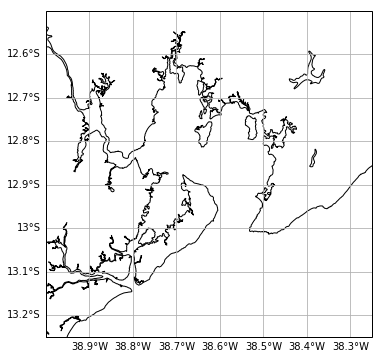

In [22]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent(extent)

shp = shapereader.Reader('./data/BTS/BTS.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(),
                      facecolor='w',
                      edgecolor='black')

## Mapas interativos

https://ocefpaf.github.io/python4oceanographers/blog/2015/11/02/icons/

In [23]:
import folium

lon, lat = -86.276, 30.935 
zoom_start = 5

mapa = folium.Map(location=[lat, lon], tiles="Cartodb Positron",
                  zoom_start=zoom_start)
mapa

In [24]:
import json

with open('data/stations.geojson') as f:
    stations = json.load(f)

with open('data/hfradar.geojson') as f:
    hfradar = json.load(f)

In [25]:
icon_size = (14, 14)

for feature in stations['features']:
    lon, lat = feature['geometry']['coordinates']
    icon_url = feature['properties']['icon']
    popup = feature['properties']['popupcontent']
    
    icon = folium.features.CustomIcon(icon_url,
                                      icon_size=(14, 14))
    
    marker = folium.map.Marker([lat, lon], icon=icon,
                               popup=folium.map.Popup(popup))
    mapa.add_child(marker)

In [26]:
style_function = lambda feature: dict(fillColor='#DEFFDE',
                                      color='#AECCAE',
                                      weight=1,
                                      opacity=1)

for feature in hfradar['features']:
    if feature['geometry']['type'] == 'Point':
        lon, lat = feature['geometry']['coordinates']
        icon_url = feature['properties']['icon']
        popup = feature['properties']['popupcontent']
        
        icon = folium.features.CustomIcon(icon_url,
                                          icon_size=(14, 14))
        marker = folium.Marker([lat, lon], icon=icon,
                                   popup=folium.Popup(popup))
        mapa.add_child(marker)
    elif feature['geometry']['type'] == 'Polygon':
        gjson = folium.features.GeoJson(feature, style_function=style_function)
        
        mapa.add_child(gjson)

In [27]:
mapa